In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
playstorefile = "datafiles/DATA/Google Play Store Apps Dataset/googleplaystore.csv"
reviewfile = "datafiles/DATA/Google Play Store Apps Dataset/googleplaystore_user_reviews.csv"

In [3]:
playstoredata = pd.read_csv(playstorefile)
reviewdata = pd.read_csv(reviewfile)

In [4]:
pd.set_option("display.max_rows", 100)

## Remove duplicate

In [5]:
playstoredata = playstoredata.drop_duplicates(subset="App")

In [6]:
playstoredata["App"].value_counts().sort_values(ascending=True).head(100)

AP Mobile - Breaking News                             1
junainfo.dy.fi                                        1
Height Converter feet-inch cm                         1
Sport Car Simulator                                   1
Loteria BR                                            1
Deaf World DW                                         1
DT-VR                                                 1
Chat Kids - Chat Room For Kids                        1
Single Parent Meet #1 Dating                          1
FollowMyHealth®                                       1
F-Secure Mobile Security                              1
ek tuhi                                               1
Anti Adware                                           1
EC Tax                                                1
Angelcare AH                                          1
BZ Berner Zeitung E-Paper                             1
Zap-Map: EV charging points UK                        1
Au Rubis les bijoutiers                         

In [7]:
playstoredata.sort_values(by="App", ascending=True).head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
10252,1. FC Köln App,SPORTS,4.6,2019,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8483,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,"100,000+",Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8M,100+,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up


In [8]:
playstoredata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# store data to a csv file to view the data again on spreadsheet

In [9]:
playstoredata.to_csv("datafiles/DATA/Google Play Store Apps Dataset/googleplaystore2.csv")

In [10]:
playstoredata[["App", "Rating", "Installs"]]

,App,Rating,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,"10,000+"
1,Coloring book moana,3.9,"500,000+"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,"5,000,000+"
3,Sketch - Draw & Paint,4.5,"50,000,000+"
4,Pixel Draw - Number Art Coloring Book,4.3,"100,000+"
...,...,...,...
10836,Sya9a Maroc - FR,4.5,"5,000+"
10837,Fr. Mike Schmitz Audio Teachings,5.0,100+
10838,Parkinson Exercices FR,NaN,"1,000+"
10839,The SCP Foundation DB fr nn5n,4.5,"1,000+"


# Removing NaN values

In [11]:
#convert the data type of the "Intalls" column to an int or float
#remove the "+" sign from there with regex and remover the "Free" value by converting it to the median value after the conversion to int or float
playstoredata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
playstoredata[playstoredata["Rating"].isna() == True][["App", "Rating", "Installs"]].head(50)

,App,Rating,Installs
23,Mcqueen Coloring pages,NaN,"100,000+"
113,Wrinkles and rejuvenation,NaN,"100,000+"
123,Manicure - nail design,NaN,"50,000+"
126,Skin Care and Natural Beauty,NaN,"100,000+"
129,"Secrets of beauty, youth and health",NaN,"10,000+"
130,Recipes and tips for losing weight,NaN,"10,000+"
134,"Lady adviser (beauty, health)",NaN,"10,000+"
163,Anonymous caller detection,NaN,"10,000+"
180,SH-02J Owner's Manual (Android 8.0),NaN,"50,000+"
185,URBANO V 02 instruction manual,NaN,"100,000+"


In [13]:
playstoredata["Rating"].fillna(playstoredata["Rating"].median(), inplace = True)

# Rating_installs dataframe

In [14]:
playstoredata[["App", "Rating", "Installs", "Category"]]

,App,Rating,Installs,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,"10,000+",ART_AND_DESIGN
1,Coloring book moana,3.9,"500,000+",ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,"5,000,000+",ART_AND_DESIGN
3,Sketch - Draw & Paint,4.5,"50,000,000+",ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,4.3,"100,000+",ART_AND_DESIGN
...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,"5,000+",FAMILY
10837,Fr. Mike Schmitz Audio Teachings,5.0,100+,FAMILY
10838,Parkinson Exercices FR,4.3,"1,000+",MEDICAL
10839,The SCP Foundation DB fr nn5n,4.5,"1,000+",BOOKS_AND_REFERENCE


In [15]:
playstoredata[["App", "Rating", "Installs", "Category"]].to_csv("datafiles/DATA/Google Play Store Apps Dataset/rating_installs.csv")

In [16]:
ri = pd.read_csv("datafiles/DATA/Google Play Store Apps Dataset/rating_installs.csv", index_col=0)

In [17]:
ri

,App,Rating,Installs,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,"10,000+",ART_AND_DESIGN
1,Coloring book moana,3.9,"500,000+",ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,"5,000,000+",ART_AND_DESIGN
3,Sketch - Draw & Paint,4.5,"50,000,000+",ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,4.3,"100,000+",ART_AND_DESIGN
...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,"5,000+",FAMILY
10837,Fr. Mike Schmitz Audio Teachings,5.0,100+,FAMILY
10838,Parkinson Exercices FR,4.3,"1,000+",MEDICAL
10839,The SCP Foundation DB fr nn5n,4.5,"1,000+",BOOKS_AND_REFERENCE


# Plot the relationships

In [56]:
x_axis = playstoredata["Rating"].head()
y_axis = playstoredata["App"].head()
installs_axis = playstoredata["Installs"].head()


In [52]:
playstoredata[["App", "Rating", "Installs"]].head()

,App,Rating,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,"10,000+"
1,Coloring book moana,3.9,"500,000+"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,"5,000,000+"
3,Sketch - Draw & Paint,4.5,"50,000,000+"
4,Pixel Draw - Number Art Coloring Book,4.3,"100,000+"


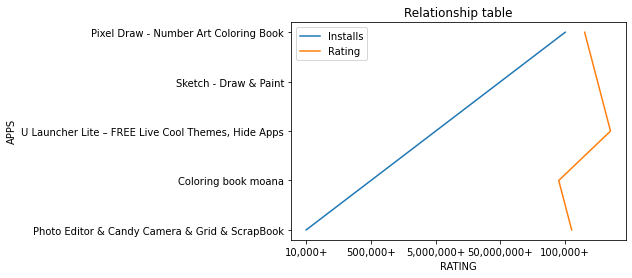

In [61]:
plt.plot(installs_axis,y_axis, label="Installs")
plt.plot(x_axis, y_axis, label="Rating")
plt.title("Relationship table")
plt.xlabel("RATING")
plt.ylabel("APPS")
plt.legend()
plt.show()